<h1>1. Prepare dataframes</h1>

Import libraries

In [2]:
import pandas as pd
import os

Prepare Renan's dataframe

In [3]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)          

Prepare Claudinei's dataframe

In [4]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)    

Prepare Guilherme's dataframe

In [15]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)
          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True)    

Merge dataframes

In [23]:
groupDataframe = pd.concat([renan,claudinei,guilherme])
groupDataframe = groupDataframe.reset_index(drop=True)
groupDataframe

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Target letter,Target person
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
3323,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
3324,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme
3325,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,O,Guilherme


<h1>2. Training</h1>

<h3>2.1 Neural network</h3>

Import libraries

In [34]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Preparation for training

In [24]:
X = groupDataframe.iloc[:,0:180]
X

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3323,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3324,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3325,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Y1 = groupDataframe.iloc[:,180]
Y1

0       A
1       A
2       A
3       A
4       A
       ..
3322    O
3323    O
3324    O
3325    O
3326    O
Name: Target letter, Length: 3327, dtype: object

In [26]:
Y2 = groupDataframe.iloc[:,181]
Y2

0           Renan
1           Renan
2           Renan
3           Renan
4           Renan
          ...    
3322    Guilherme
3323    Guilherme
3324    Guilherme
3325    Guilherme
3326    Guilherme
Name: Target person, Length: 3327, dtype: object

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=4845)

X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=478)

<h3>Training</h3>

In [28]:
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,3), random_state=1, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf1.fit(X1_train, np.ravel(y1_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 3), max_iter=5000,
              random_state=1, solver='lbfgs')

In [40]:
seed = random.randrange(1268) 
clf2 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(150,120), random_state=seed, max_iter=5000, activation='logistic') #2 camadas ocultas com 2 neurônios
clf2.fit(X2_train, np.ravel(y2_train))

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(150, 120),
              max_iter=5000, random_state=504, solver='sgd')

Testing

In [21]:
y1_pred = clf1.predict(X1_test)
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred)
plt.title('Classifier neural network')
plt.show()

NameError: name 'clf1' is not defined

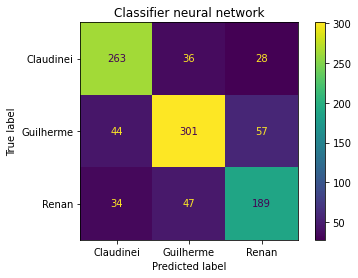

In [41]:
y2_pred = clf2.predict(X2_test)
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred)
plt.title('Classifier neural network')
plt.show()

In [20]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           A       0.79      0.90      0.84       227
           E       0.97      0.97      0.97       206
           I       0.92      0.94      0.93       204
           O       0.93      0.82      0.87       230
           U       0.88      0.83      0.85       132

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999



In [42]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

   Claudinei       0.77      0.80      0.79       327
   Guilherme       0.78      0.75      0.77       402
       Renan       0.69      0.70      0.69       270

    accuracy                           0.75       999
   macro avg       0.75      0.75      0.75       999
weighted avg       0.75      0.75      0.75       999



<h1>3. Instant translate</h1>

<h3>3.1 Bayes classifier</h3/>

Calculating the probability of each letter

In [32]:
probA = groupDataframe[(groupDataframe["targetLetter"] == 'A')]#.value_counts()/len(groupDataframe.index)
probA

KeyError: 'targetLetter'

In [24]:
groupDataframe["A"]

KeyError: 'A'